# Inventory of discrete distributions

This notebook contains all the figure generation code for [Section 2.3 Inventory of discrete distributions]() of the **No Bullshit Guide to Statistics**.

#### Notebook setup

In [1]:
# load Python modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,5)},
)

%config InlineBackend.figure_format = 'retina'


DESTDIR = "figures/prob/probpanels"  # where to save figures
if not os.path.exists(DESTDIR):
    os.mkdir(DESTDIR)

In [3]:
# set random seed for repeatability
np.random.seed(42)

In [4]:
from ministats import ensure_containing_dir_exists
from ministats import generate_pmf_panel
from ministats import plot_pmf
from ministats import plot_cdf

You already have plot_helpers.py, so we can proceed.


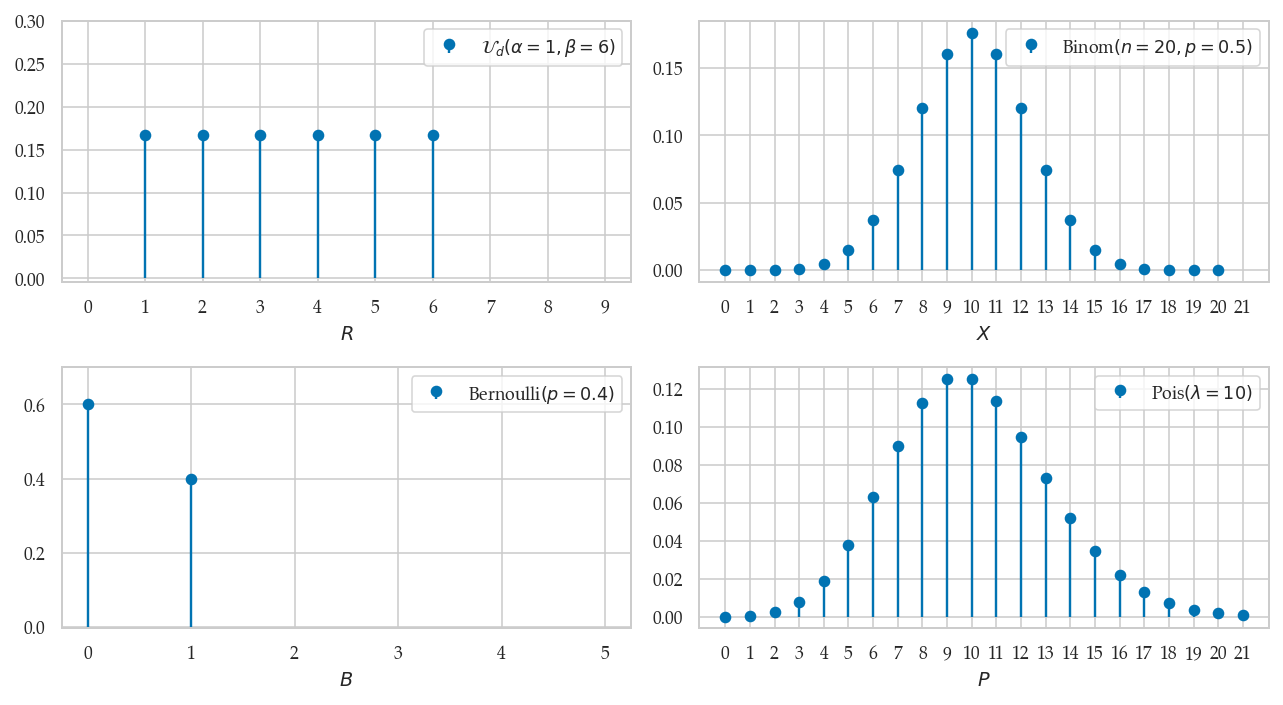

In [5]:
filename = os.path.join(DESTDIR, "prob_models_discrete_examples_panel.pdf")

from scipy.stats import randint
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy.stats import poisson


from ministats import plot_pmf

with plt.rc_context({"figure.figsize":(9,5)}):
    fig, axs = plt.subplots(2,2) # ,sharex=True)
    
    # randint
    ax = axs[0,0]
    rvR = randint(1, 6+1)
    plot_pmf(rvR, xlims=[0,10], ylims=[-0.004,0.3], ax=ax, label="$\mathcal{U}_d(\\alpha=1,\\beta=6)$")
    ax.set_xlabel("$R$")
    ax.set_ylabel("")

    # bernoulli
    ax = axs[1,0]
    rvN = bernoulli(0.4)
    plot_pmf(rvN, xlims=[0,6], ylims=[-0.004,0.7], ax=ax, label="Bernoulli$(p=0.4)$")
    ax.set_xlabel("$B$")
    ax.set_ylabel("")

    # binom
    ax = axs[0,1]
    rvB = binom(20, 0.5)
    plot_pmf(rvB, xlims=[0,22], ax=ax, label="Binom$(n=20,p=0.5)$")
    ax.set_xlabel("$X$")
    ax.set_ylabel("")

    # poisson
    ax = axs[1,1]
    lam = 10
    rvP = poisson(lam)
    plot_pmf(rvP, xlims=[0,22], ax=ax, label="Pois$(\lambda=10)$")
    ax.set_xlabel("$P$")
    ax.set_ylabel("")

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

## Definitions

## Math prerequisites

## Discrete distributions reference

### Discrete uniform

In [6]:
# import the model family
from scipy.stats import randint

# choose parameters
alpha = 1  # start at
beta = 4   # stop at

# create the rv object
rvU = randint(alpha, beta+1)

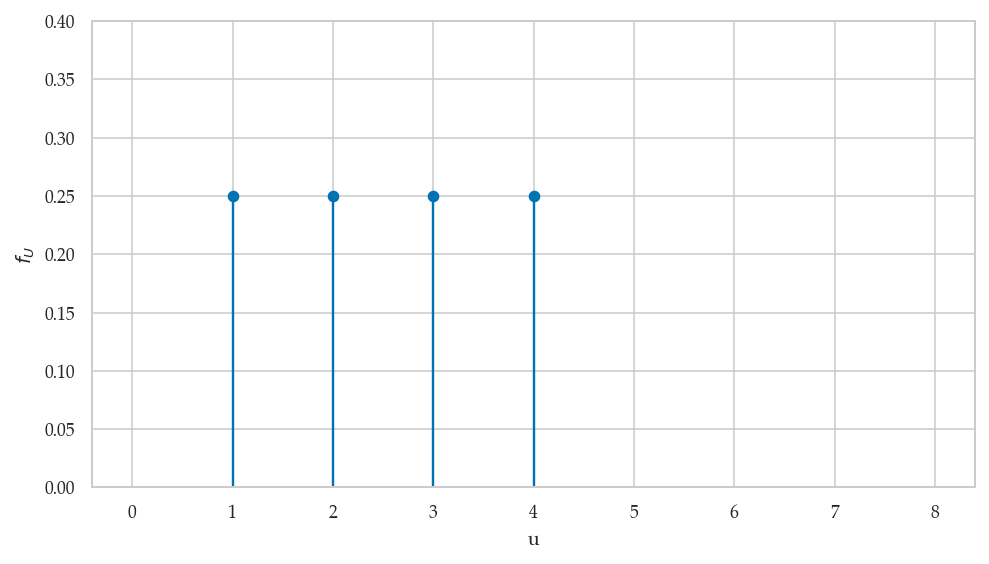

In [7]:
filename = os.path.join(DESTDIR, "plot_pmf_rvU_1_to_4.pdf")
ax = plot_pmf(rvU, xlims=[0,8+1], ylims=[0,0.4], rv_name="U")
ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Cumulative distribution function

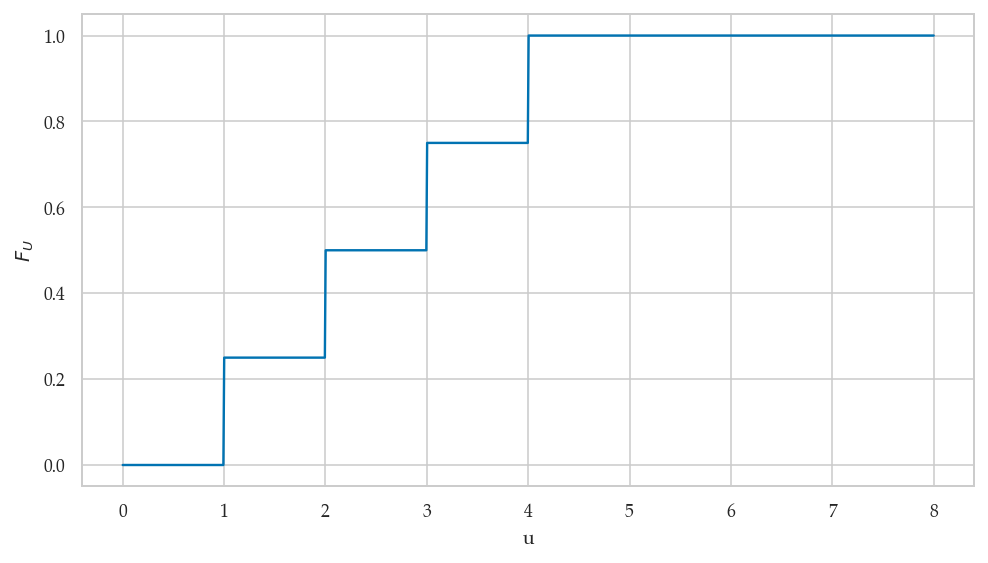

In [8]:
filename = os.path.join(DESTDIR, "plot_CDF_rvU_1_to_4.pdf")
ax = plot_cdf(rvU, xlims=[0,8], rv_name="U")
ax.figure.tight_layout()
ax.figure.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

Let's generate 10 random observations from random variable `rvX`:

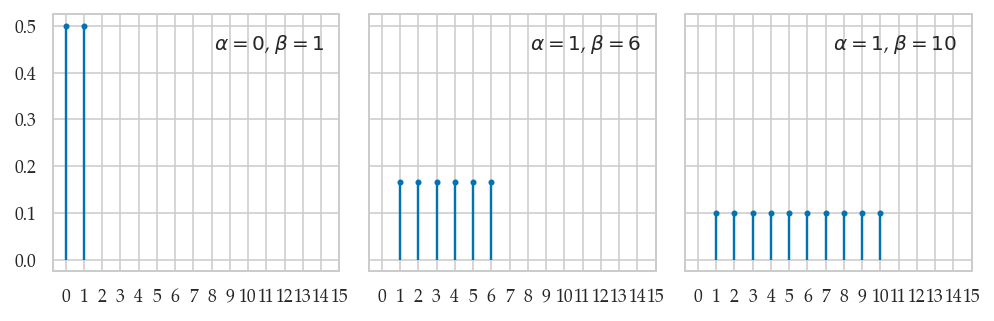

In [9]:
from scipy.stats import randint

xmax = 15
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 1)

# parameter dicts (list of lists)
params_matrix = [
    [dict(low=0,high=1+1),    dict(low=1,high=6+1),    dict(low=1,high=10+1)],
]

params_to_latex = {
    "low": "\\alpha",
    "high": "\\beta",
}

with plt.rc_context({"figure.figsize":(7,2.3)}):
    _ = generate_pmf_panel("figures/prob/probpanels/randint_panel.pdf",
                           xs, randint, params_matrix,
                           params_to_latex=params_to_latex,
                           xticks=xticks)

### Bernoulli

In [10]:
from scipy.stats import bernoulli

rvB = bernoulli(p=0.3)

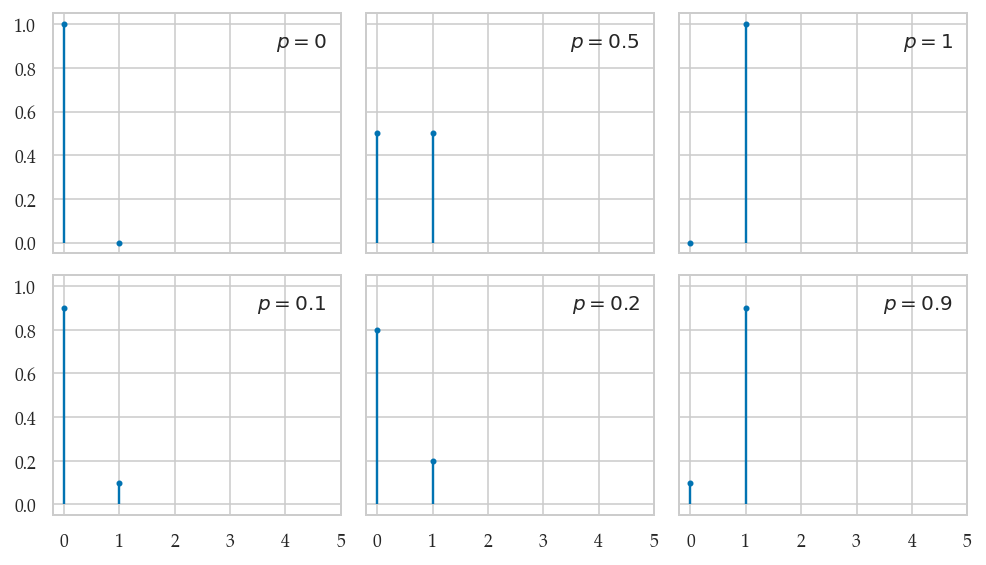

In [11]:
from scipy.stats import bernoulli

xmax = 5
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 1)


# parameter dicts (list of lists)
params_matrix = [
    [dict(p=0),  dict(p=0.5),  dict(p=1)],
    [dict(p=0.1),  dict(p=0.2),  dict(p=0.9)],
]

_ = generate_pmf_panel("figures/prob/probpanels/bernoulli_panel.pdf",
                   xs, bernoulli, params_matrix,
                   params_to_latex=params_to_latex,
                   xticks=xticks)

### Poisson


In [12]:
from scipy.stats import poisson
lam = 10
rvP = poisson(lam)

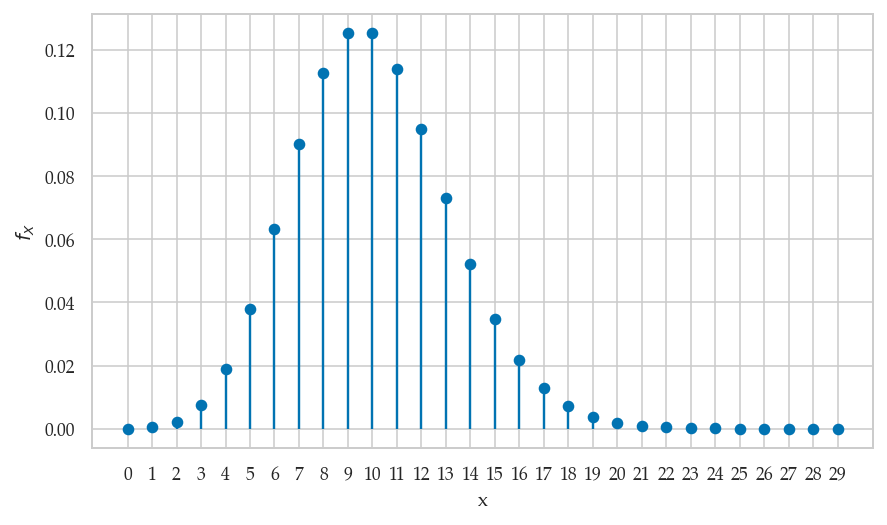

In [13]:
_ = plot_pmf(rvP, xlims=[0,30])

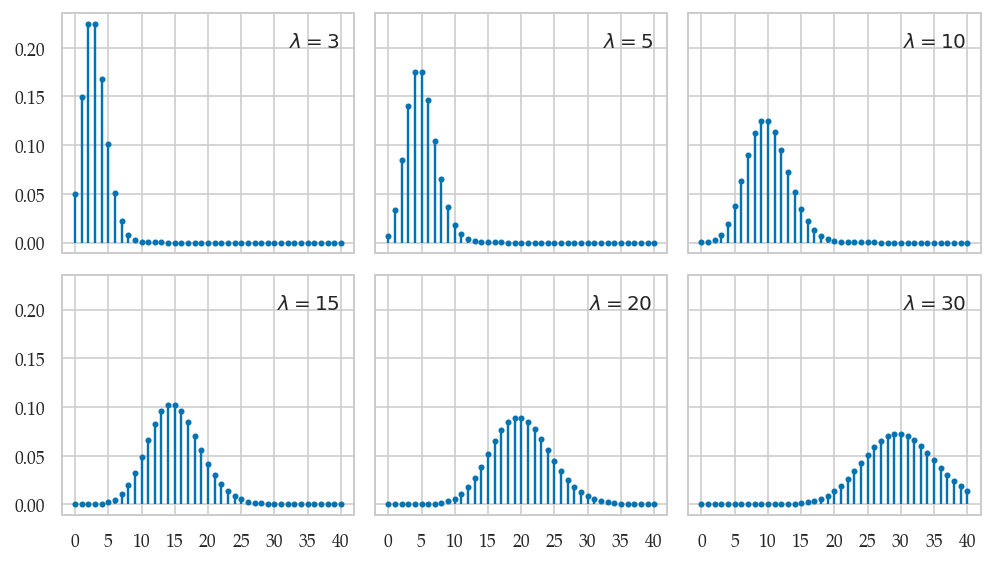

In [14]:
from scipy.stats import poisson

xmax = 41
xs = np.arange(0, xmax)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [dict(mu=3),  dict(mu=5),  dict(mu=10)],
    [dict(mu=15), dict(mu=20), dict(mu=30)]
]

params_to_latex = {
    'mu': '\\lambda'
}

_ = generate_pmf_panel("figures/prob/probpanels/poisson_panel.pdf",
                       xs, poisson, params_matrix, xticks=xticks,
                       params_to_latex=params_to_latex)

### Binomial

We'll use the name `rvX` because `rvB` was already used for the Bernoulli random variable above.

In [15]:
from scipy.stats import binom

n = 20
p = 0.14
rvX = binom(n,p)


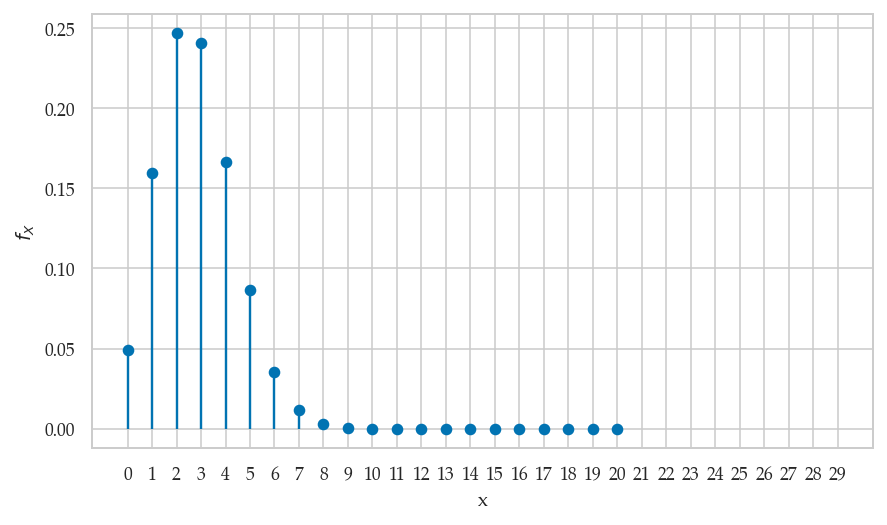

In [16]:
_ = plot_pmf(rvX, xlims=[0,30])

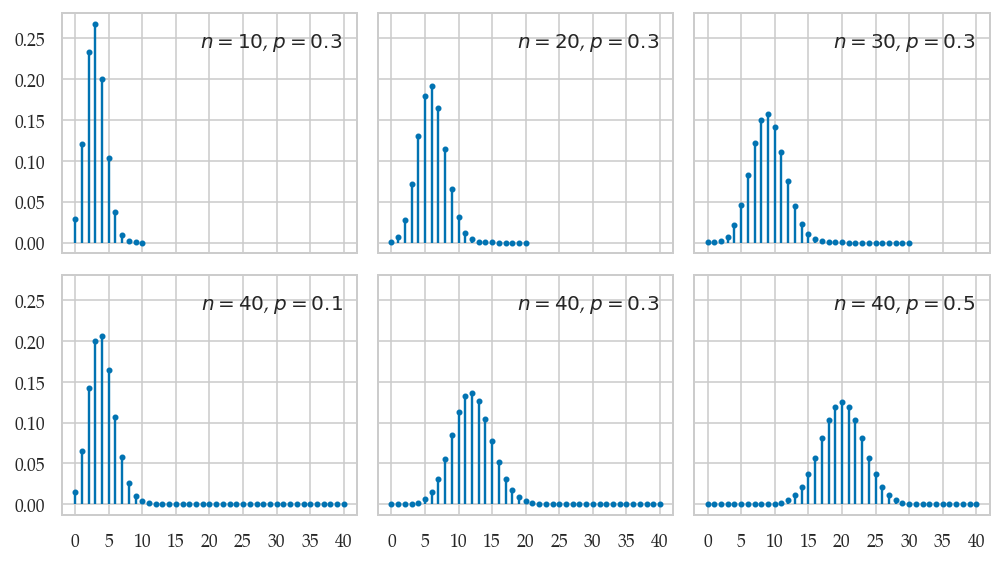

In [17]:
from scipy.stats import binom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=10, p=0.3),  dict(n=20, p=0.3),  dict(n=30, p=0.3) ],
    [ dict(n=40, p=0.1),   dict(n=40, p=0.3),   dict(n=40, p=0.5)  ],
]

_ = generate_pmf_panel("figures/prob/probpanels/binomial_panel.pdf",
                       xs, binom, params_matrix, xticks=xticks)

### Geometric

In [18]:
from scipy.stats import geom

rvG = geom(p = 0.2)

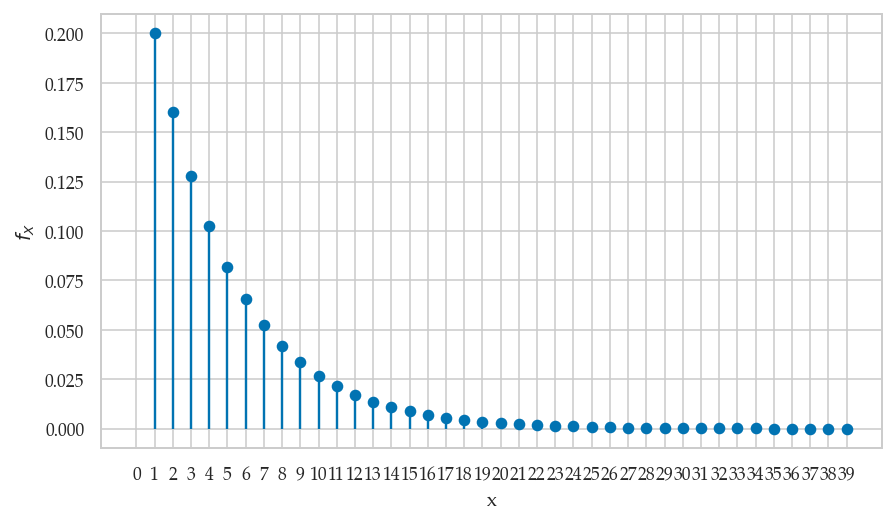

In [19]:
_ = plot_pmf(rvG, xlims=[0,40])

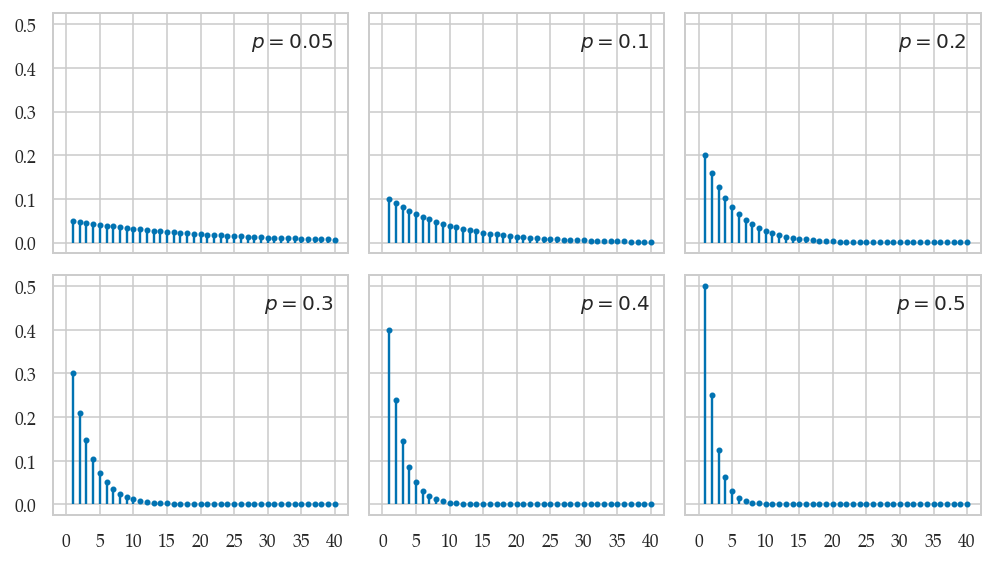

In [20]:
from scipy.stats import geom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(p=0.05),  dict(p=0.1),  dict(p=0.2) ],
    [ dict(p=0.3),   dict(p=0.4),  dict(p=0.5) ],
]

_ = generate_pmf_panel("figures/prob/probpanels/geometric_panel.pdf",
                       xs, geom, params_matrix, xticks=xticks)

### Negative binomial

In [21]:
from scipy.stats import nbinom

r = 10
p = 0.5
rvN = nbinom(r,p)

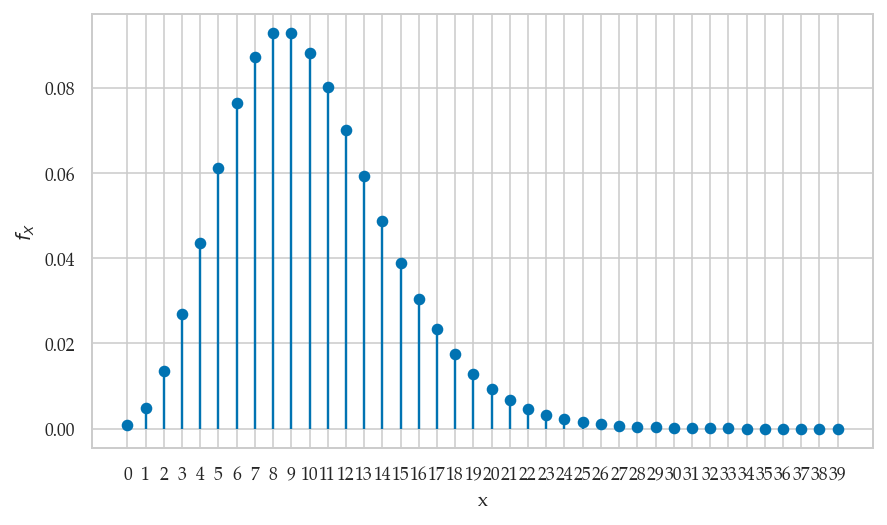

In [22]:
_ = plot_pmf(rvN, xlims=[0,40])

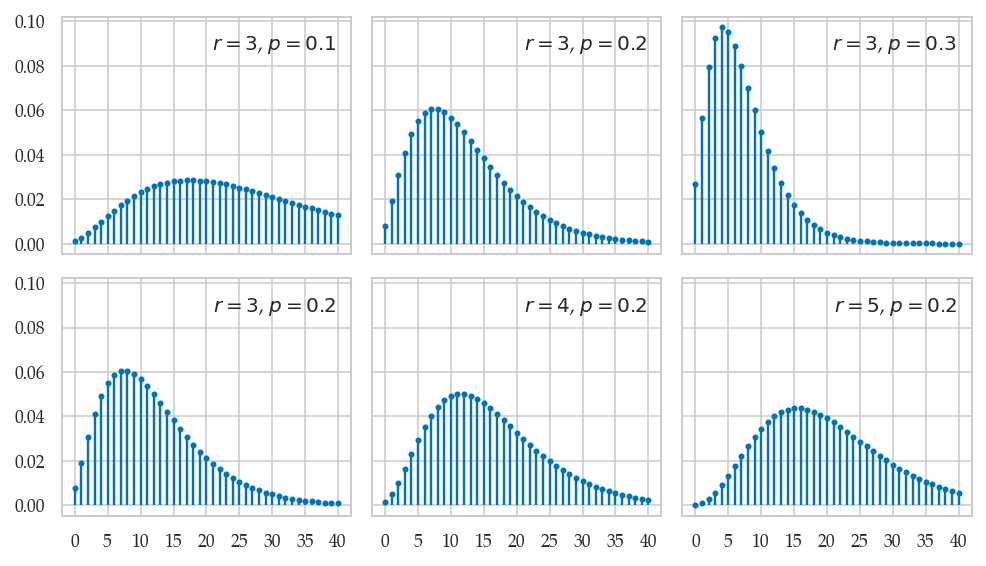

In [23]:
from scipy.stats import nbinom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(n=3,p=0.1), dict(n=3,p=0.2), dict(n=3,p=0.3) ],
    [ dict(n=3,p=0.2), dict(n=4,p=0.2), dict(n=5,p=0.2) ],
]

_ = generate_pmf_panel("figures/prob/probpanels/nbinom_panel.pdf",
                       xs, nbinom, params_matrix, xticks=xticks)

### Hypergeometric

<!--
# - arg1 = `internal M` = the total number of objects   == a+b
# - arg2 = `internal n` = number of success objects     == a 
# - arg3 = `internal N` = number of draws               == n
-->

In [24]:
from scipy.stats import hypergeom

a = 30   # number of success balls
b = 40   # number of failure balls
n = 20   # how many we're drawing

rvH = hypergeom(a+b, a, n)

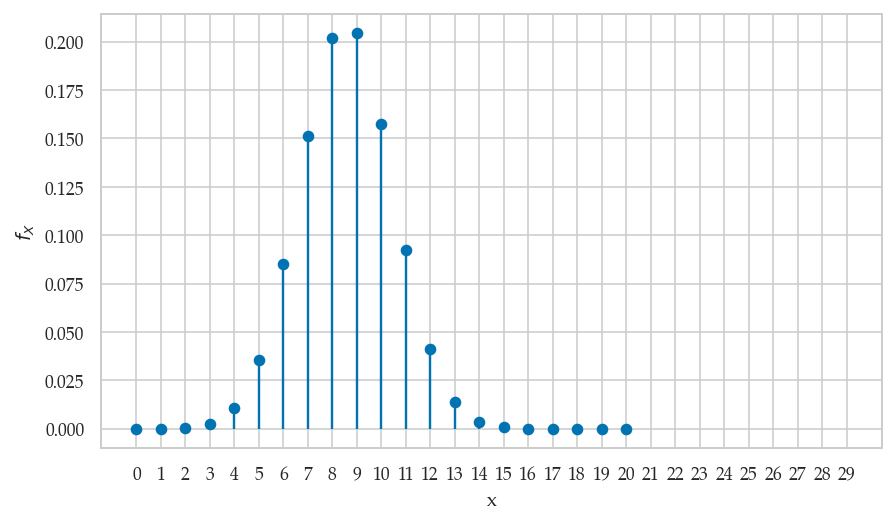

In [25]:
_ = plot_pmf(rvH, xlims=[0,30])

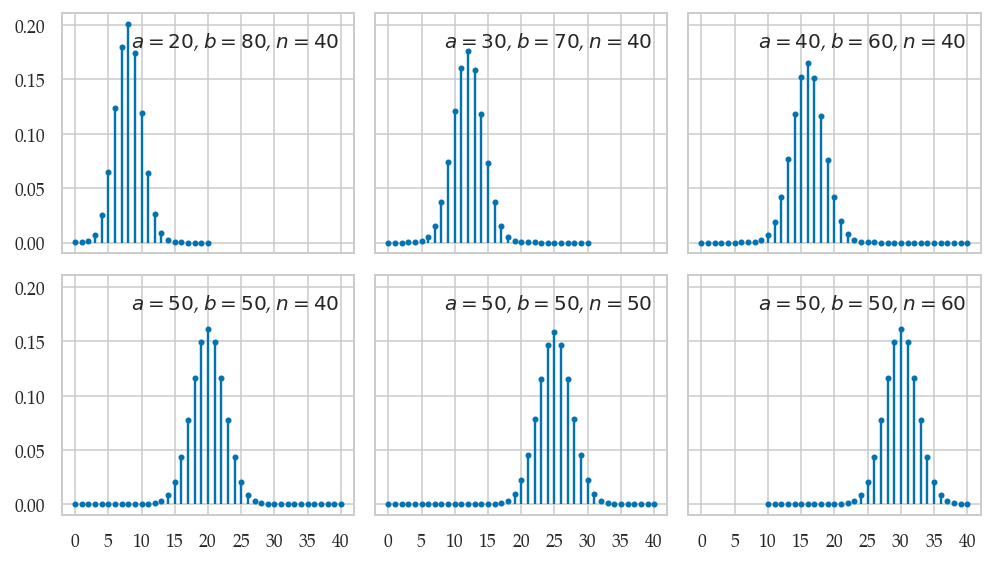

In [26]:
from scipy.stats import hypergeom

xmax = 40
xs = np.arange(0, xmax+1)
xticks = np.arange(0, xmax+1, 5)

# parameter dicts (list of lists)
params_matrix = [
    [ dict(M=100,n=20,N=40), dict(M=100,n=30,N=40), dict(M=100,n=40,N=40) ],
    [ dict(M=100,n=50,N=40), dict(M=100,n=50,N=50), dict(M=100,n=50,N=60) ],
]

_ = generate_pmf_panel("figures/prob/probpanels/hypergeom_panel.pdf",
                       xs, hypergeom, params_matrix, xticks=xticks)

##### Tomatoes salad probabilities

(0.28571428571428575, 0.5714285714285715, 0.14285714285714288)

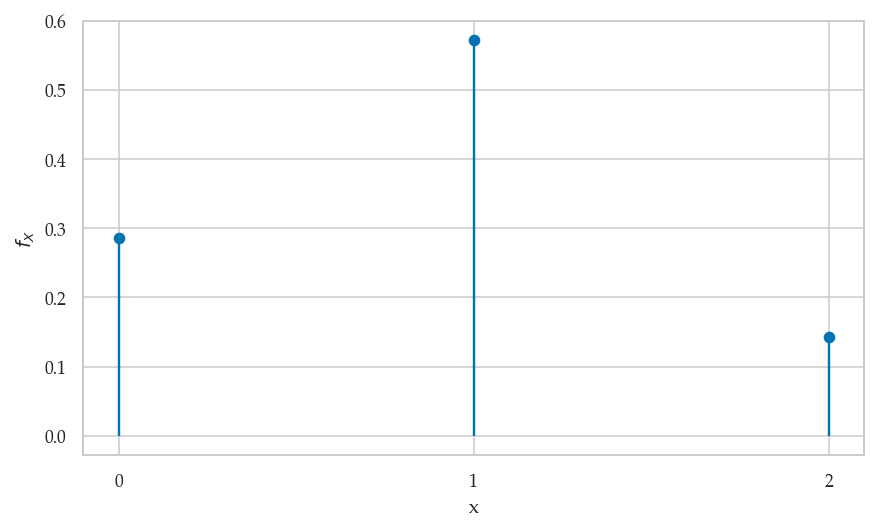

In [27]:
a = 3   # number of good tomatoes
b = 4   # number of rotten tomatoes
n = 2   # how many we're drawing

rvHe = hypergeom(a+b, a, n)


_ = plot_pmf(rvHe, xlims=[0,3])

rvHe.pmf(0), rvHe.pmf(1), rvHe.pmf(2)

##### Number of dogs seen by Amy

In [28]:
a = 7        # number dogs
b = 20 - 7   # number of other animals
n = 12       # how many "patients" Amy will see today

rvD = hypergeom(a+b, a, n)

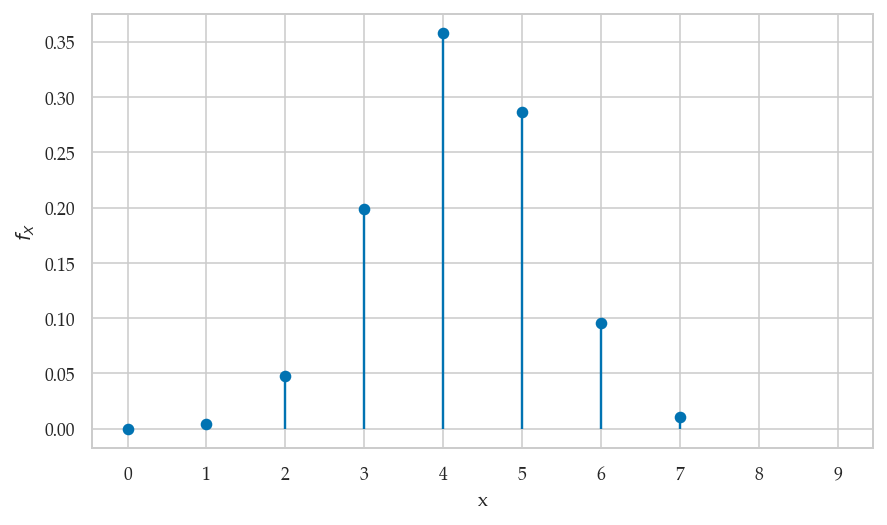

In [29]:
_ = plot_pmf(rvD, xlims=[0,10])

### Multinomial

See [docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html).

In [30]:
from scipy.stats import multinomial

n = 10
ps = [0.1, 0.5, 0.8]

rvM = multinomial(n,ps)

In [32]:
# TODO: 3D scatter plot of points in space

## Modelling real-world data using probability

## Discussion